In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
#In console run following:
#pip install scikit-image
#pip install graphviz
#pip install dask-image
#pip install imageio[pyav]
import dask
import matplotlib
import numpy
import dask_image.imread
import dask_image.ndfilters
import dask_image.ndmeasure
import dask.array as da
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
video_frames = []
datasets = ['include-50','include-50-2']
for dataset in datasets:
    for root,_,filenames in os.walk("/kaggle/input/{dataset_name}".format(dataset_name = dataset)):
        for filename in filenames:
            #print(os.path.join(root,filename))
            file_path = os.path.join(root,filename)
            x = dask_image.imread.imread(file_path)
            video_frames.append(x)

In [11]:
len(video_frames)

1146

In [2]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose
import matplotlib.pyplot as plt
import copy
import numpy as np
from src import model
from src import util
from src.body import Body
from src.hand import Hand

!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model

body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 154 (delta 69), reused 152 (delta 67), pack-reused 0
Receiving objects: 100% (154/154), 20.18 MiB | 22.54 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/kaggle/working/pytorch-openpose


In [14]:
len(video_frames[0])

56

In [17]:
video_frames[0]

,Array,Chunk
Bytes,332.23 MiB,5.93 MiB
Shape,"(56, 1080, 1920, 3)","(1, 1080, 1920, 3)"
Count,168 Tasks,56 Chunks
Type,uint8,numpy.ndarray


In [40]:
vdo_canvas = generate_hand_keypoints_canvas_for_one_video(video_frames[0])

In [42]:
len(vdo_canvas)

56

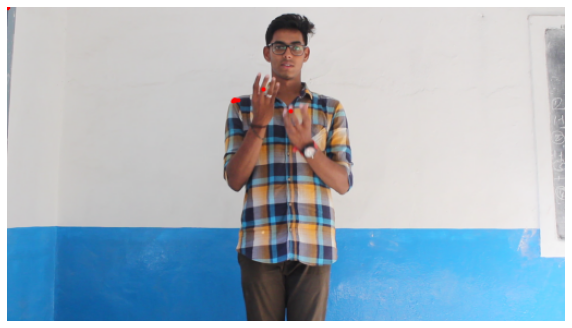

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(vdo_canvas[30]) #canvas[:, :, [2, 1, 0]]
plt.axis('off')
plt.show()

In [22]:
#pip install napari[all] napari_video
import napari
from napari_video.napari_video import VideoReaderNP

In [27]:
vdos = []

[/kaggle/input/include-50/Animals/4. Bird/MVI_2987.MOV with 76 frames of size (1080, 1920, 3) at 25.00 fps]

In [38]:
type(video_frames[0][0])

dask.array.core.Array

In [26]:
vdos.append(VideoReaderNP('/kaggle/input/include-50/Animals/4. Bird/MVI_2987.MOV'))


In [29]:
def get_all_hand_peaks(hands_list,oriImg):
    all_hand_peaks = []
    for x, y, w, is_left in hands_list:
        peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) #pretrained model, last layer: convolution_param-> num_output: 22, 21 Keypoints
        #peaks is coordinates wrt x,y top left.
        #adjust coordinates of keypoints
        peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
        peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y) 
        all_hand_peaks.append(peaks)
    return all_hand_peaks


In [14]:
#figure ret val and vdos_keypoints, vdo_keypoints
def generate_hand_keypoints_for_one_video(video):
    vdo_canvas = []
    vdo_keypoints = []
    Num_of_frames = len(video)
    for f in range(Num_of_frames):
        oriImg = video[f]

        candidate, subset = body_estimation(oriImg)
        canvas = copy.deepcopy(oriImg)
        hands_list = util.handDetect(candidate, subset, oriImg)
        all_hand_peaks = get_all_hand_peaks(hands_list,oriImg)
        canvas = util.draw_handpose(canvas, all_hand_peaks)
        vdo_canvas.append(canvas)
        #vdos_keypoints.append(np.array(vdo_keypoints,dtype = 'float32'))
    return vdo_canvas

In [39]:
def generate_hand_keypoints_canvas_for_one_video(video):
    vdo_canvas = []
    Num_of_frames = len(video)
    for f in range(Num_of_frames):
        oriImg = np.array(video[f])

        candidate, subset = body_estimation(oriImg)
        canvas = copy.deepcopy(oriImg)
        hands_list = util.handDetect(candidate, subset, oriImg)
        all_hand_peaks = get_all_hand_peaks(hands_list,oriImg)
        canvas = util.draw_handpose(canvas, all_hand_peaks)
        vdo_canvas.append(canvas)
    return vdo_canvas

This function should take one vdo and return its hand keypoint, then append those keypoints to X. check Vee's paf codes too.

When it fails to detect hands, co ordinates are 0,0, we want that to be ignored. we dont want the model to be trained on that.

In [13]:
vdo_canvas = generate_hand_keypoints_for_one_video(vdos[0])

NameError: name 'i' is not defined

In [ ]:
len(vdo_canvas)
#76X288X512X3
#frames x 

In [17]:
labels = ['Bird','Black','Car','Dog','Fall','Father','Good Morning', 'Red','Summer','White','loud','quiet','happy','long','short','big large', 'small little','hot', 'new','dry','good','Cow','Hat', 'T-Shirt', 'Shoes', 'Monday', 'Year', 'Time', 'Fan', 'Cell phone', 'Hello', 'Thank you', 'Window', 'Pen', 'Paint', 'Teacher', 'Priest', 'train ticket', 'Brother', 'Boy', ' Girl', ' Bank', 'I', 'it','you', 'Election', 'Death', 'Court', 'House', 'Store or Shop']

In [18]:
lines = [24,15,16,13,12,18,17,18,11,19,15,18,18,15,16,17,18,15,18,21,18,18,14,17,16,12,8,12,12,10,14,14,11,12,12,11,14,14,16,17,18,16,18,12,18,12,9,20,20,18]

In [ ]:
len(labels)

In [24]:
vdos

[/kaggle/input/include/Animals_1of2/Animals/4. Bird/MVI_2987.MOV with 76 frames of size (1080, 1920, 3) at 25.00 fps]

In [ ]:
y = []

In [ ]:
for i in range(49):
    for j in range(1,lines[i]):
        y.append(i)

In [ ]:
len(y)

Dask Trials
https://blog.dask.org/2019/06/20/load-image-data

https://napari.org/stable/tutorials/processing/dask.html
https://github.com/dask/dask-examples/blob/main/applications/image-processing.ipynb

Tried:
1. glob returns an array of all filenames, imread takes glob like string and not the array.
iglob does return an iterator but it still isn't working. It says:
Could not detect your file type because it did not have an extension. Try specifying a loader class, e.g. Video(<generator object _iglob at 0x7f5ec4c5c1d0>)
To Do: Figure out how to specify a loader class.


2. Dask requirements.txt or environment.yml not yet run
I tried to use the binder environment (requires ur repo to be public, did that) butt it says:
package libgcc-ng-12.2.0-h65d4601_19 requires _libgcc_mutex 0.1 conda_forge, but none of the providers can be installed

To Do: Install all the requirements and run

3. Read vdos using napari and use dask array.. how to increase dask array...
TO DO: checkout AI4bharat's work on include.

In [24]:
filename_pattern1 = os.path.join('/kaggle/input/include/Animals_1of2/Animals/4. Bird','MVI*.MOV')

In [26]:
filename_pattern1

'/kaggle/input/include/Animals_1of2/Animals/4. Bird/MVI*.MOV'

In [30]:
tiled_astronaut_images = dask_image.imread.imread(filename_pattern1)

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f687e6fef80>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/pims/pyav_reader.py", line 365, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


UnknownFormatError: All handlers returned exceptions:
<class 'pims.pyav_reader.PyAVReaderTimed'> errored: [Errno 2] No such file or directory: '/kaggle/input/include/Animals_1of2/Animals/4. Bird/MVI*.MOV'
<class 'pims.pyav_reader.PyAVReaderIndexed'> errored: [Errno 2] No such file or directory: '/kaggle/input/include/Animals_1of2/Animals/4. Bird/MVI*.MOV'
<class 'pims.moviepy_reader.MoviePyReader'> errored: The MoviePyReader requires moviepy to work.


In [32]:
print('\nNamed with wildcard *:')
for name in glob.iglob('/kaggle/input/include-50/Animals/4. Bird/*.M*'):
    print(name)


Named with wildcard *:
/kaggle/input/include-50/Animals/4. Bird/MVI_3040.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_3070.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_3011.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_2989.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_8568.MP4
/kaggle/input/include-50/Animals/4. Bird/MVI_3038.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_3072.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_3094.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_8567.MP4
/kaggle/input/include-50/Animals/4. Bird/MVI_3095.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_4157.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_2987.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_4155.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_2988.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_4156.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_3012.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_3096.MOV
/kaggle/input/include-50/Animals/4. Bird/MVI_3013.MOV
/kag

In [36]:
filename_pattern1 = os.path.join('/kaggle/input/include-50/Animals/4. Bird','MVI_2987.MOV')
one_vdo = dask_image.imread.imread(filename_pattern1)
#dask_image.imread.imread('/kaggle/input/include-50/Animals/4. Bird/MVI_2987.MOV')

In [37]:
one_vdo

,Array,Chunk
Bytes,450.88 MiB,5.93 MiB
Shape,"(76, 1080, 1920, 3)","(1, 1080, 1920, 3)"
Count,228 Tasks,76 Chunks
Type,uint8,numpy.ndarray


In [38]:
type(one_vdo)

dask.array.core.Array

In [39]:
filenames = glob.glob('/kaggle/input/include-50/Animals/4. Bird/*.MOV')


In [41]:
import imageio

In [42]:
lazy_arrays = [dask.delayed(imageio.imread)(fn) for fn in filenames]
#lazy_arrays = [da.from_delayed(x, shape=sample.shape, dtype=sample.dtype)
               #for x in lazy_arrays]

In [43]:
filenames

['/kaggle/input/include-50/Animals/4. Bird/MVI_3040.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3070.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3011.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_2989.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3038.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3072.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3094.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3095.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_4157.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_2987.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_4155.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_2988.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_4156.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3012.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3096.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3013.MOV',
 '/kaggle/input/include-50/Animals/4. Bird/MVI_3071.MOV',
 '/kaggle/inpu

In [44]:
lazy_arrays

[Delayed('imread-62d21244-9ee9-4041-9432-d936a596b781'),
 Delayed('imread-4a480782-5a68-40df-8c73-a0ff2f788c40'),
 Delayed('imread-f1259554-3ff1-4f81-a5d6-6172da75ce22'),
 Delayed('imread-6c210ce0-dc49-4b50-a338-db4020fd7698'),
 Delayed('imread-3294fa1a-2705-47de-9574-ee041ebe2ec4'),
 Delayed('imread-d997990e-fbc4-45d8-9752-7d5bea262d72'),
 Delayed('imread-2b3f02f7-5096-4784-a9aa-039035edfc66'),
 Delayed('imread-02ac4d7c-27fb-44e2-b9af-10891ea90dce'),
 Delayed('imread-28f06fd1-c930-4159-b9d7-34f248393229'),
 Delayed('imread-175c5afa-fa97-43a9-b690-a4d5b8638db6'),
 Delayed('imread-79b1dd05-be04-4154-8f7d-7ae0dd8de56b'),
 Delayed('imread-4439739e-e438-4131-91a9-4063a070b50c'),
 Delayed('imread-d3aa2a3a-e6bb-4d0f-8f56-747467ec28fb'),
 Delayed('imread-4674b642-7217-4038-9974-2b179422900b'),
 Delayed('imread-29248262-edad-4709-afb4-ff2dfc91d581'),
 Delayed('imread-3db78788-bb2a-4092-828a-93e766dc632d'),
 Delayed('imread-ce163d69-52bd-48d5-b82f-00e5b7bcca3f'),
 Delayed('imread-f97f2a38-b284-

In [45]:
lazy_arrays[0].compute()

ValueError: Could not find a backend to open `/kaggle/input/include-50/Animals/4. Bird/MVI_3040.MOV`` with iomode `ri`.

In [46]:
import dask_image
x = dask_image.imread.imread('/kaggle/input/include-50/Animals/4. Bird/*.MOV')

ValueError: Could not find a backend to open `/kaggle/input/include-50/Animals/4. Bird/MVI_2987.MOV`` with iomode `ri`.